---
# **5. 개발자를 위한 ChatGPT 활용법_실습**
---
---

<br/> <br/>

# **버그 및 에러 찾기**

---







*   에러 코드



In [ ]:
import Random

# 주장 리스트
team_leaders = [ '메이슨', '손응민', '다이어', '로메로']

#리스트 섞기
random.shuffle(team_leaders)

#결과 출력
print("팀 선택 순위: ", ' -> '.join(team_leaders))

ModuleNotFoundError: ignored

* 에러가 수정된 코드

In [ ]:
import random

# 주장 리스트
team_leaders = ['메이슨', '손응민', '다이어', '로메로']

# 리스트 섞기
random.shuffle(team_leaders)

# 결과 출력
print("팀 선택 순위:", ' -> '.join(team_leaders))


팀 선택 순위: 메이슨 -> 손응민 -> 다이어 -> 로메로


<br/>

#**작은 함수들을 ChatGPT로 만들어 보기**
---

In [ ]:
def calculate(num1, num2, operator):
    if operator == '+':
        result = num1 + num2
    elif operator == '-':
        result = num1 - num2
    elif operator == '*':
        result = num1 * num2
    elif operator == '/':
        result = num1 / num2
    else:
        raise ValueError("올바른 연산자를 입력하세요 (+, -, *, /)")
    return result

# 사용자 입력 받기
num1 = int(input("첫 번째 정수를 입력하세요: "))
num2 = int(input("두 번째 정수를 입력하세요: "))
operator = input("연산자를 입력하세요 (+, -, *, /): ")

# 연산 수행
try:
    result = calculate(num1, num2, operator)
    print("결과:", result)
except ZeroDivisionError:
    print("0으로 나눌 수 없습니다.")
except ValueError as e:
    print(e)


첫 번째 정수를 입력하세요: 3
두 번째 정수를 입력하세요: 0
연산자를 입력하세요 (+, -, *, /): /
0으로 나눌 수 없습니다.


<br/>






#**ChatGPT로 복잡한 모델을 만드는 법**


---







*   mnist 손글씨 데이터셋을 분류하는 모델



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# 신경망 모델 생성
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 이미지를 1차원으로 펼치기
    Dense(128, activation='relu'),   # 은닉층 (128개의 뉴런과 ReLU 활성화 함수)
    Dense(10, activation='softmax')  # 출력층 (10개의 클래스에 대한 확률 분포)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_images, train_labels, epochs=5)

# 테스트 데이터로 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2587 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1121 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0779 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0578 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9861
313/313 - 1s - loss: 0.0884 - accuracy: 0.9712 - 624ms/epoch - 2ms/step

테스트 정확도: 0.9711999893188477


* 테스트 데이터셋 일부를 불러와 이미지로 그려보고 모델의 손글씨 인식값과 실제 정답을 함께 표시하는 코드

1/1 [==============================] - 0s 102ms/step


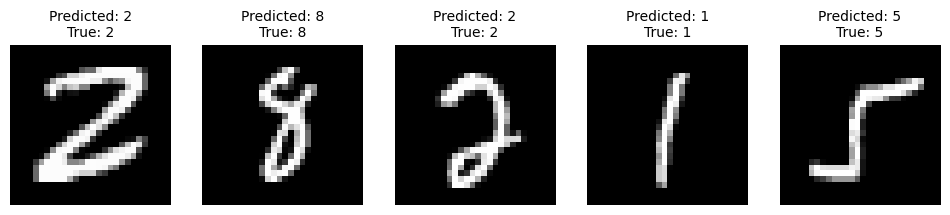

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

# MNIST 데이터셋 로드 및 전처리
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0

# 모델 로드
#model = load_model('mnist_model.h5')  # 모델 파일 경로를 적절히 수정하세요

# 테스트 데이터셋에서 이미지와 레이블 가져오기
num_samples = 5  # 시각화할 이미지 개수
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

# 이미지 시각화 및 모델 예측
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# 이미지와 예측값 그리기
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nTrue: {sample_labels[i]}", fontsize=10)
    plt.axis('off')
plt.show()


<br/>

# **ChatGPT로 알고리즘 복잡도를 측정하는 법**
---





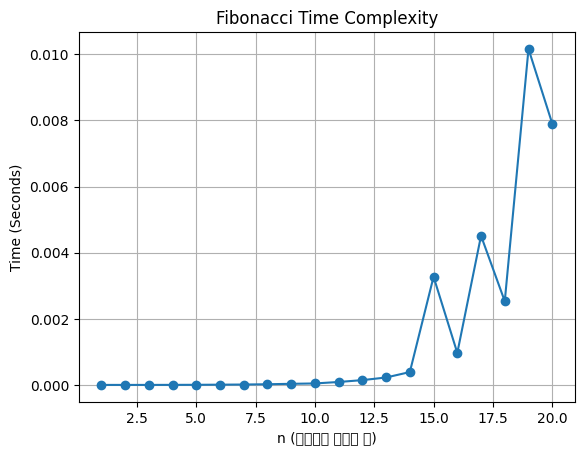

In [ ]:
import time
import matplotlib.pyplot as plt

# 재귀적인 방법으로 피보나치 수열 계산
def fibonacci_recursive(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

n_values = list(range(1, 21))  # n 값의 범위 설정 (1부터 20까지)
execution_times = []

# 각 n 값에 대한 함수 실행 시간 측정
for n in n_values:
    start_time = time.time()
    fibonacci_recursive(n)
    end_time = time.time()
    execution_times.append(end_time - start_time)

# 그래프 그리기
plt.plot(n_values, execution_times, marker='o')
plt.xlabel('n (피보나치 수열의 항)')
plt.ylabel('Time (Seconds)')
plt.title('Fibonacci Time Complexity')
plt.grid(True)
plt.show()


<br/>

# **코드 리팩토링에 ChatGPT 활용하기**
---


* 최대값 찾기 (리팩토링 전)

In [ ]:

def max_value(numbers) :
     max_val = None
     for num in numbers :
          if max_val is None or num > max_val :
              max_val = num
     return max_val

* 최대값 찾기 (리팩토링 후)

In [ ]:
def max_value(numbers):
    return max(numbers) if numbers else None


* 소수 찾기 (리팩토링 전)

In [ ]:
def find_primes(limit) :
  primes = []
  for num in range(2, limit+1):
    is_prime = True
    for i in range(2, num):
      if (num % i) == 0:
        is_prime = False
        break
    if is_prime:
      primes.append(num)
  return primes



<br/>


# **ChatGPT를 활용해 데이터 전처리 하기**
---

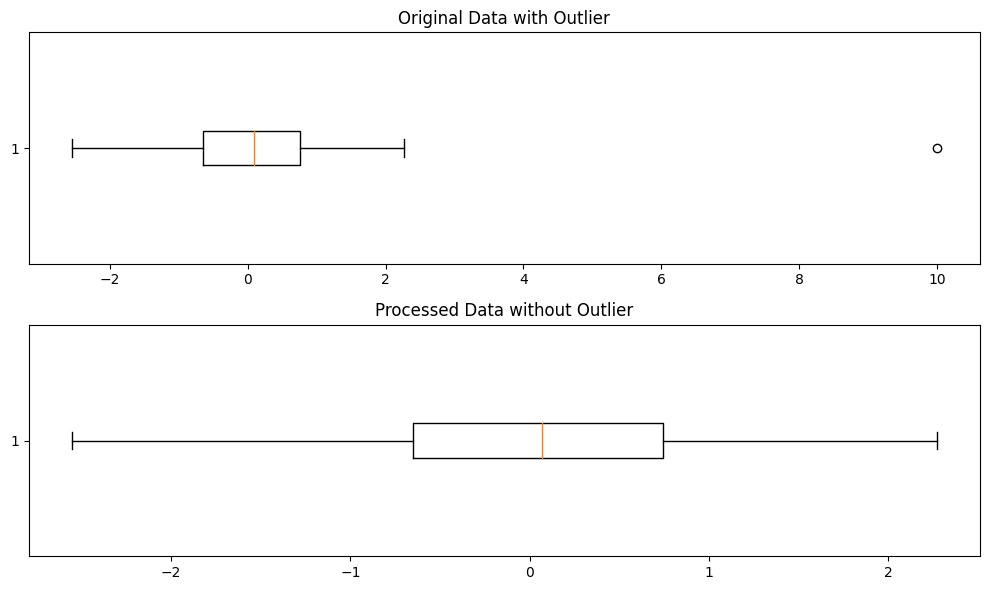

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 예시 샘플 생성
np.random.seed(0)
data = np.random.normal(0, 1, 100)  # 정규 분포를 따르는 데이터
data[98] = 10  # 이상치 추가

# IQR 방법을 사용한 이상치 처리
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

processed_data = data[(data >= lower_bound) & (data <= upper_bound)]

# 결과 시각화
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.boxplot(data, vert=False)
plt.title("Original Data with Outlier")

plt.subplot(2, 1, 2)
plt.boxplot(processed_data, vert=False)
plt.title("Processed Data without Outlier")

plt.tight_layout()
plt.show()


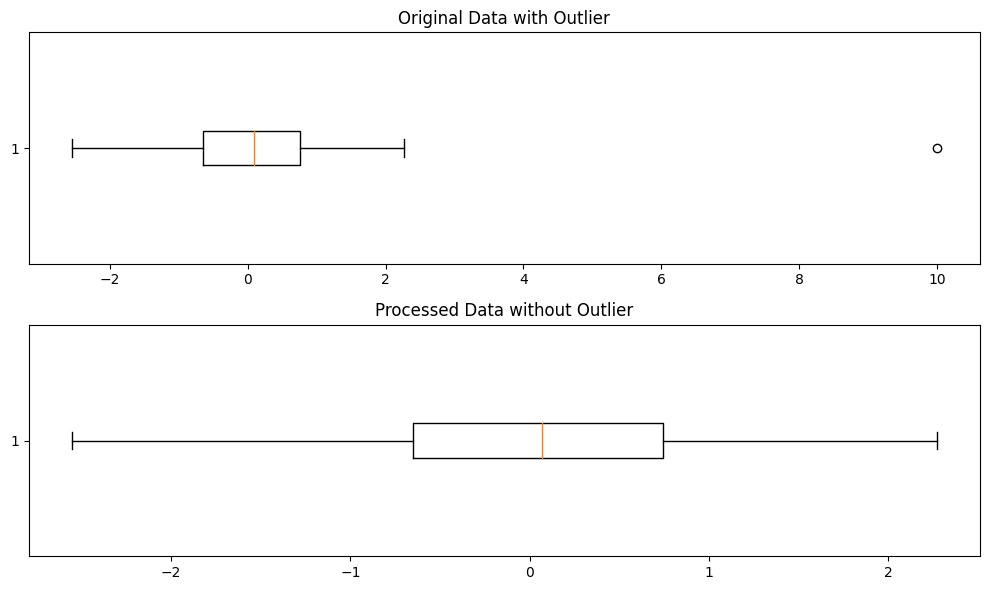

Original Data Mean: 0.1585388946074488
Processed Data Mean: 0.05913019657318061


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 예시 샘플 생성
np.random.seed(0)
data = np.random.normal(0, 1, 100)  # 정규 분포를 따르는 데이터
data[98] = 10  # 이상치 추가

# IQR 방법을 사용한 이상치 처리
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

processed_data = data[(data >= lower_bound) & (data <= upper_bound)]

# 결과 시각화
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.boxplot(data, vert=False)
plt.title("Original Data with Outlier")

plt.subplot(2, 1, 2)
plt.boxplot(processed_data, vert=False)
plt.title("Processed Data without Outlier")

plt.tight_layout()
plt.show()

# 분포의 차이 설명
original_mean = np.mean(data)
processed_mean = np.mean(processed_data)

print("Original Data Mean:", original_mean)
print("Processed Data Mean:", processed_mean)


<br/>

# **데이터 특성을 알려주고, 적합한 딥러닝/기계학습 모델 선정하기**
---

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Iris 데이터셋 로드
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# 레이블 인코딩
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 신경망 모델 구성
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 테스트 데이터로 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\n테스트 정확도:', test_acc)


Epoch 1/50
4/4 [==============================] - 4s 372ms/step - loss: 1.1847 - accuracy: 0.3083 - val_loss: 1.0768 - val_accuracy: 0.3667
Epoch 2/50
4/4 [==============================] - 0s 58ms/step - loss: 1.1381 - accuracy: 0.3167 - val_loss: 1.0341 - val_accuracy: 0.3667
Epoch 3/50
4/4 [==============================] - 0s 58ms/step - loss: 1.0955 - accuracy: 0.3417 - val_loss: 1.0006 - val_accuracy: 0.3667
Epoch 4/50
4/4 [==============================] - 0s 30ms/step - loss: 1.0585 - accuracy: 0.4083 - val_loss: 0.9703 - val_accuracy: 0.4667
Epoch 5/50
4/4 [==============================] - 0s 60ms/step - loss: 1.0242 - accuracy: 0.5083 - val_loss: 0.9421 - val_accuracy: 0.6667
Epoch 6/50
4/4 [==============================] - 0s 57ms/step - loss: 0.9938 - accuracy: 0.6917 - val_loss: 0.9151 - val_accuracy: 0.7333
Epoch 7/50
4/4 [==============================] - 0s 64ms/step - loss: 0.9666 - accuracy: 0.7083 - val_loss: 0.8903 - val_accuracy: 0.7333
Epoch 8/50
4/4 [==========

<br/><br/><br/>

---
# **6. ChatGPT API 사용방법_실습**
---
---

In [ ]:
import openai

def main():

  openai.api_key = "YOUR_API_KEY"

  response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
          {"role": "system", "content": "You are a helpful assistant."},
          {"role": "user", "content": "Who won the world series in 2020?"},
          {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
          {"role": "user", "content": "Where was it played?"}
      ]
  )

  output_text = response["choices"][0]["message"]["content"]
  print(output_text)
